In [1]:
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [8]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.0e-20,1.0e-16)
    slc.show()

For the FACTOR = 100 sphere, core formation seemed to happen at t = 9.60E+11 s. So we want to introduce a sink particle at that time. 

In [4]:
FAT_FACTOR = 100
ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_0000".format(FAT_FACTOR))
dim = 256
all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
rho  = np.max(np.array(all_data["density"]))
print "central density is : ", rho

G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
jeans_length = sqrt(pi*c_s**2/(G*rho))
boxlen =1e19
lev_max = 5
cell_size = boxlen/(2**(lev_max+2))
rho_threshold = pi*c_s**2/(4*G*jeans_length**2)
r_acc = 2.5*cell_size
rho_threshold=  pi*c_s**2/(4*G*r_acc**2)
print "sink_density_thresh = ", rho_threshold
print "sink_accretion_radius = ", r_acc
print "sink_softening_radius = ", r_acc

central density is :  1.0145485398e-17
sink_density_thresh =  2.54794669312e-19
sink_accretion_radius =  1.953125e+17
sink_softening_radius =  1.953125e+17


I turned off the density refinement criterion, made the $\Delta$ levels smaller

Tried making the blocks bigger but everytime I did this it doesn't even compile 


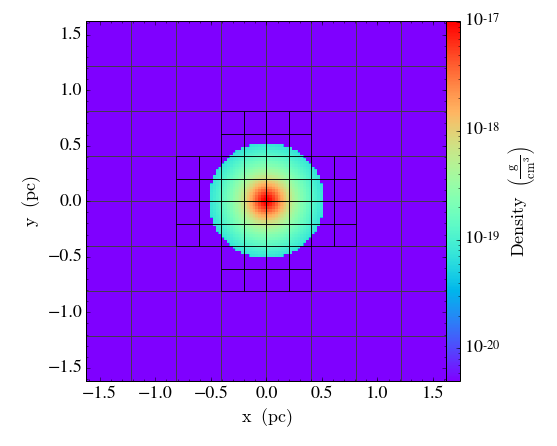

In [9]:
plot_dens(0,grid=True)


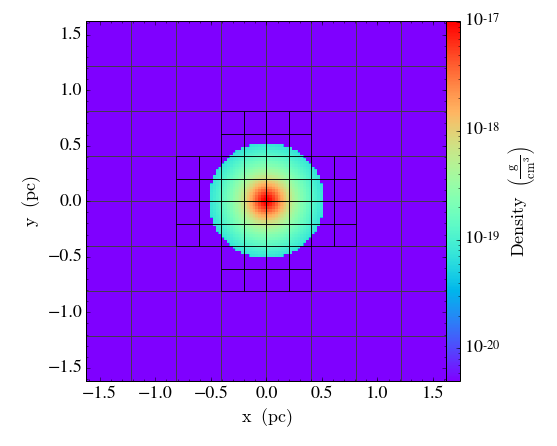


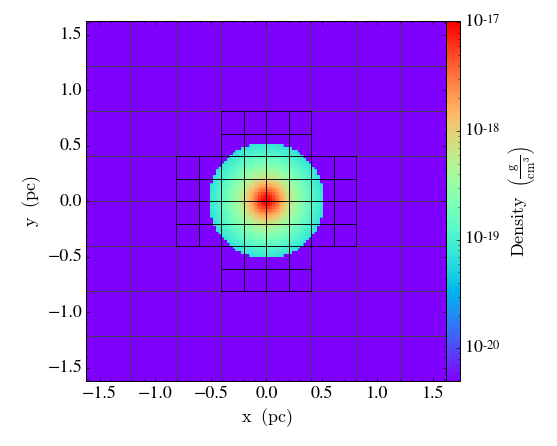


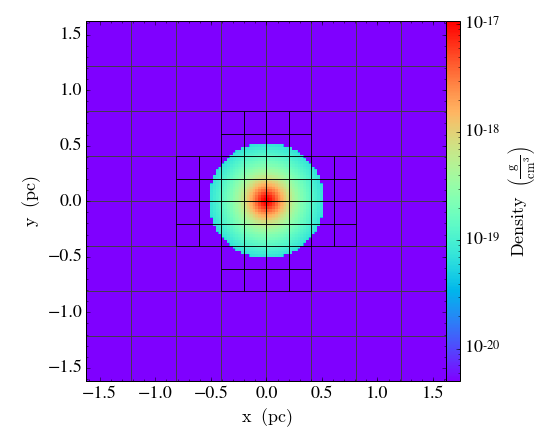


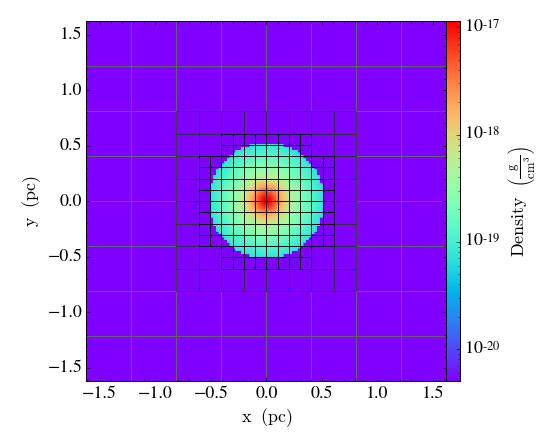


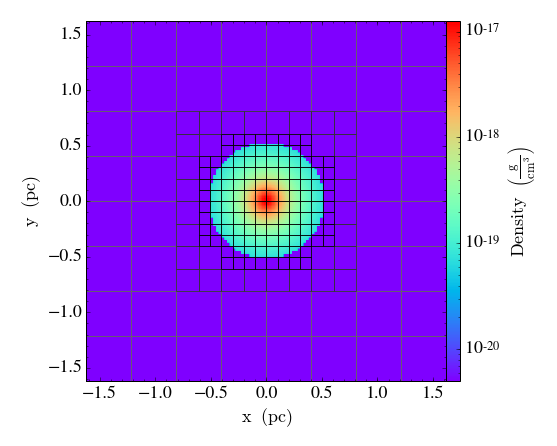


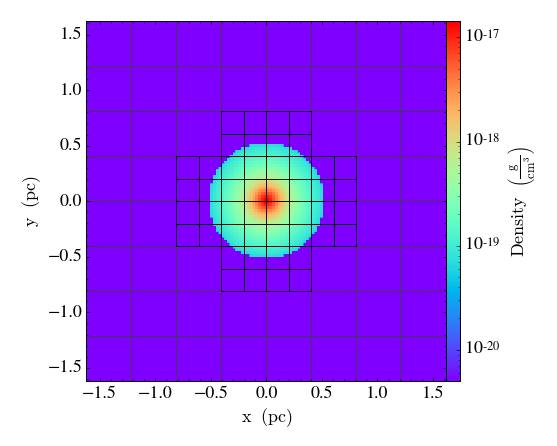


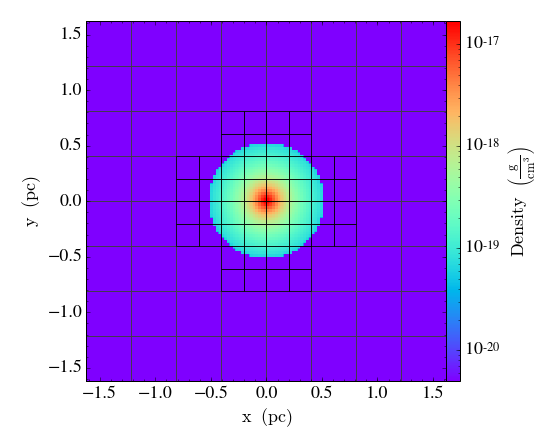


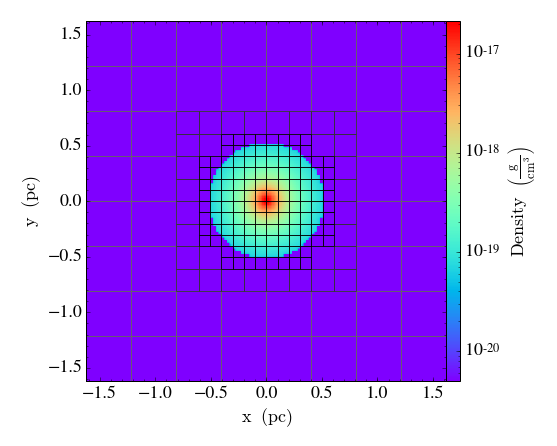

Exception RuntimeError: 'maximum recursion depth exceeded while calling a Python object' in <bound method HDF5FileHandler.__del__ of <yt.utilities.file_handler.HDF5FileHandler object at 0x7f8a72e07bd0>> ignored



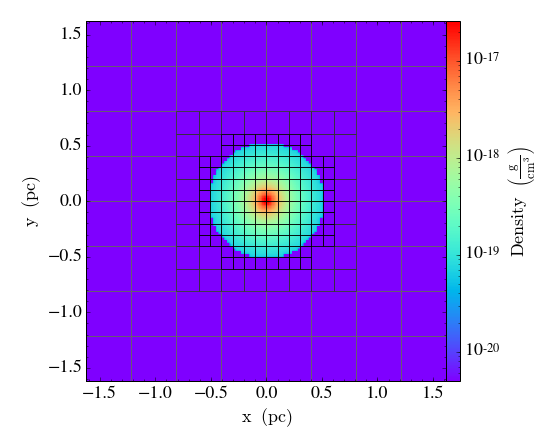


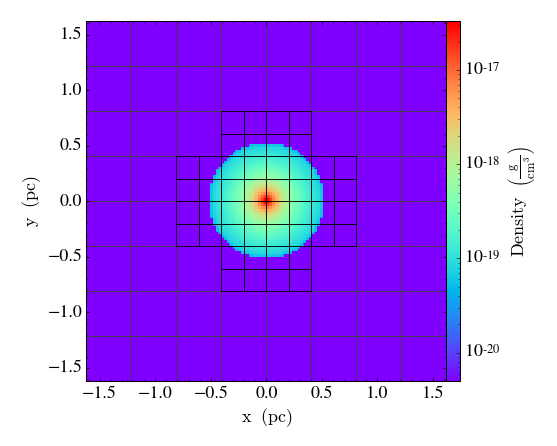


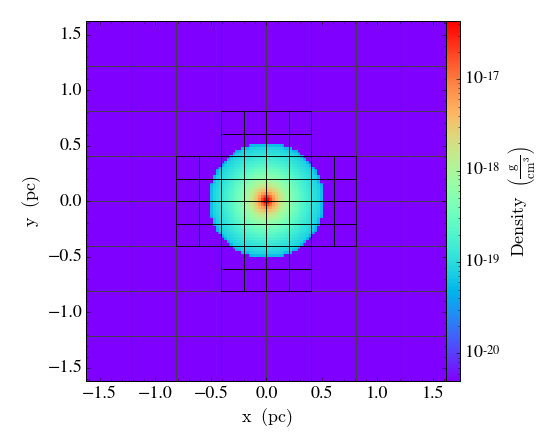


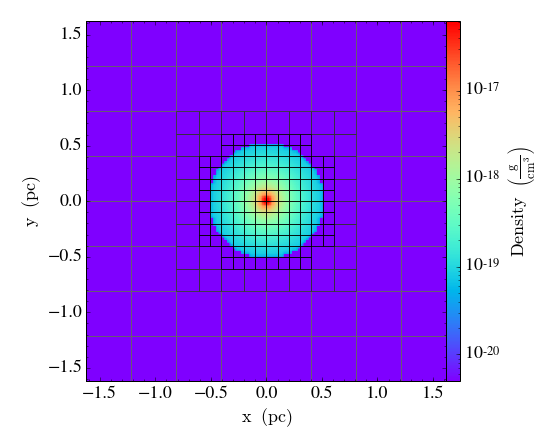

In [12]:
for i in np.arange(34):
    if i%3==0:
        plot_dens(i,grid=True)

Now I turn off all refinement criterion and use lev 7~10